<a href="https://colab.research.google.com/github/Alaaomar9/Fake-News-Detection-/blob/main/fake_news_lstm_last_viergen_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install --upgrade tensorflow

In [ ]:
!pip install plotly
!pip install tensorflow
!pip install --upgrade nbformat
!pip install Keras-Preprocessing
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
!pip install jupyterthemes


import tensorflow as tf
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
import re

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, Input,LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("stopwords")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df_true = pd.read_csv("/content/True.csv")
df_fake = pd.read_csv("/content/Fake.csv")

In [ ]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<Axes: xlabel='count', ylabel='subject'>

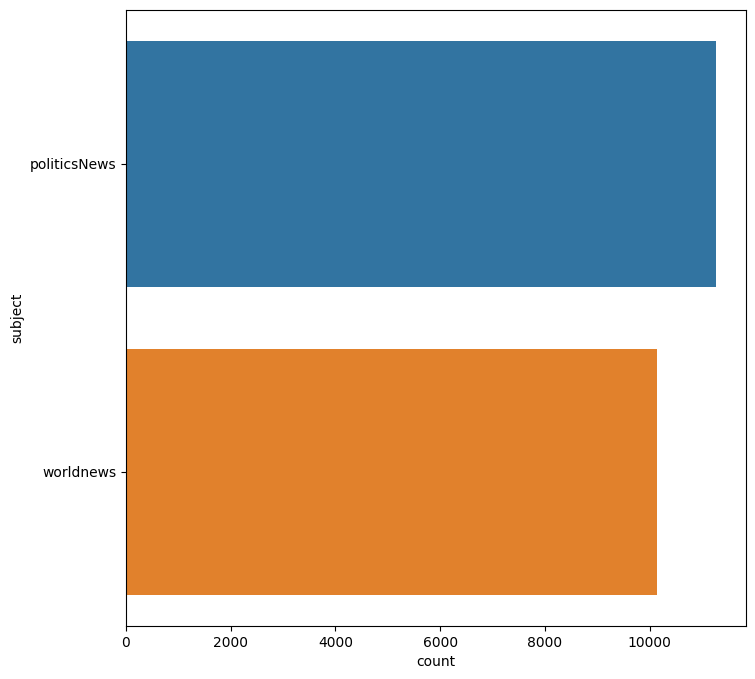

In [ ]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df_true)

<Axes: xlabel='count', ylabel='subject'>

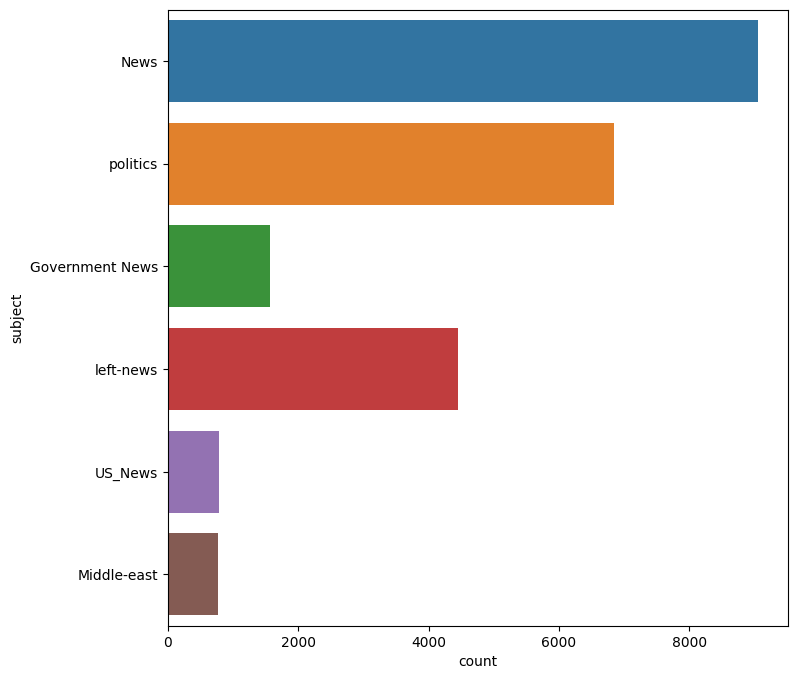

In [ ]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df_fake)

In [ ]:
df_fake["Label"] = "Fake"
df_true["Label"] = "True"

In [ ]:
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

<Axes: xlabel='count', ylabel='subject'>

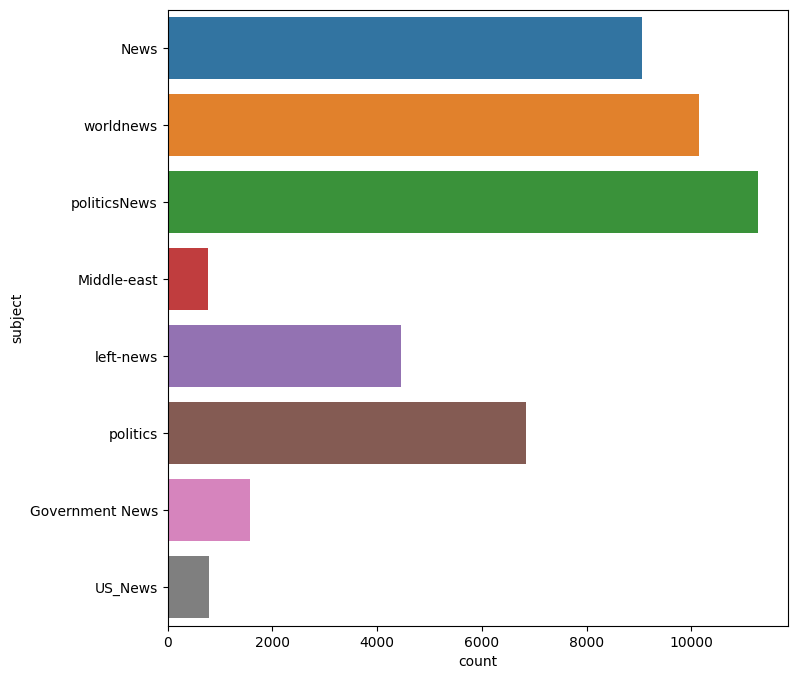

In [ ]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

In [ ]:
df.drop(columns = ['date'], inplace = True)
df

,title,text,subject,Label
0,NRA Terrorist Organization Remains Silent Aft...,It s time to shut them down. Permanently.On Su...,News,Fake
1,Iran says 'biased' French stance threatens Mid...,ANKARA (Reuters) - Iran accused France on Frid...,worldnews,True
2,Uruguay vice president quits amid probe into u...,MONTEVIDEO (Reuters) - Uruguay s Vice Presiden...,worldnews,True
3,"Trump, frustrated by Afghan war, suggests firi...",WASHINGTON (Reuters) - President Donald Trump...,politicsNews,True
4,Exclusive: Congressional leaders were briefed ...,WASHINGTON (Reuters) - U.S. intelligence offic...,politicsNews,True
...,...,...,...,...
44893,It’s Not Over Yet: Jill Stein Files Federal L...,Green Party presidential nominee Jill Stein ha...,News,Fake
44894,SHOCKING REPORT: 99.5% Of Professors From Top ...,These leftist professors aren t just donating ...,politics,Fake
44895,Senate Republican leader says plans vote on co...,WASHINGTON (Reuters) - U.S. Senate Majority Le...,politicsNews,True
44896,"After Months Of Concern Trolling, Trump Prove...",Amid one of the most racist presidential campa...,News,Fake


In [ ]:
sub_tf_df=df.groupby('Label').apply(lambda x:x['title'].count()).reset_index(name='Counts')
sub_tf_df.Label.replace({0:'False',1:'True'},inplace=True)
sub_tf_df

,Label,Counts
0,Fake,23481
1,True,21417


In [ ]:
fig = px.bar(sub_tf_df, x="Label", y="Counts",
             color='Counts', barmode='group',
             height=400)
fig.show()

In [ ]:
df["text"] = df["title"]+df["text"]

In [ ]:
df['Label'] = df['Label'].map({'True':1, 'Fake':0})

In [ ]:
df.sample(5)

,title,text,subject,Label
25926,Trump and Vietnam's president underscore free ...,Trump and Vietnam's president underscore free ...,politicsNews,1
18087,BREAKING BAD NEWS FOR HILLARY: FBI Expanding I...,BREAKING BAD NEWS FOR HILLARY: FBI Expanding I...,politics,0
11980,Trump Gets His A** Handed To Him After Whinin...,Trump Gets His A** Handed To Him After Whinin...,News,0
38815,"Obama lauds Denver Broncos, Peyton Manning for...","Obama lauds Denver Broncos, Peyton Manning for...",politicsNews,1
4818,"Dopey Santas, McAfee Hacked, Silicon Valley vs...","Dopey Santas, McAfee Hacked, Silicon Valley vs...",Middle-east,0


In [ ]:
df.Label[9943]

1

In [ ]:
df.text[36709]

'Turkish activist charged with trying to overthrow government: mediaISTANBUL (Reuters) - Prominent Turkish rights activist and businessman Osman Kavala has been jailed pending trial, charged with seeking to overthrow the government, state-run Anadolu news agency reported on Wednesday. An Istanbul court remanded Kavala in custody as part of an investigation into the movement of U.S.-based cleric Fethullah Gulen, which Ankara accuses of carrying out an attempted coup in July last year, the agency said. It said Kavala was charged with  attempting to overthrow the constitutional order  and  attempting to overthrow the government of the Republic of Turkey . Kavala, whose Anadolu Kultur organization is involved in promoting culture and rights, was detained nearly two weeks ago at Istanbul s Ataturk Airport, prompting expressions of concern from Europe and the United States.  Since the failed putsch on July 15, 2016, more than 50,000 people have been jailed as they face trial and some 150,000

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove stopwords and remove words with 2 or less characters using gensim
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [ ]:
# Apply the function to the dataframe
df['clean'] = df['text'].apply(preprocess)
# Show original news
df['text'][0]

' NRA Terrorist Organization Remains Silent After Worst Mass Shooting In American HistoryIt s time to shut them down. Permanently.On Sunday evening, 64-year-old Stephen Craig Paddock poured gunfire on a concert at the Harvest Festival in Las Vegas, Nevada from his hotel room at Mandalay Bay.22,000 people were in attendance. 50 were killed and over 400 were wounded.Paddock fired  clip after clip after clip  from his assault rifle and the carnage stopped when police shot him dead.In Nevada, machine guns are legal and can be openly carried.Stricter gun laws might have prevented Paddock from acquiring the weapon he used to kill so many people.But the National Rifle Association has continued defending gunmen like Paddock for years by arguing that guns of any kind should be in the hands of every American.Thousands of Americans have died because of this irresponsible stance, and you can bet that the NRA will say that  now is not the time to discuss our gun laws  while at the same time only of

In [ ]:
print(df['clean'][0])

['terrorist', 'organization', 'remains', 'silent', 'worst', 'mass', 'shooting', 'american', 'historyit', 'time', 'shut', 'permanently', 'sunday', 'evening', 'year', 'stephen', 'craig', 'paddock', 'poured', 'gunfire', 'concert', 'harvest', 'festival', 'vegas', 'nevada', 'hotel', 'room', 'mandalay', 'people', 'attendance', 'killed', 'wounded', 'paddock', 'fired', 'clip', 'clip', 'clip', 'assault', 'rifle', 'carnage', 'stopped', 'police', 'shot', 'dead', 'nevada', 'machine', 'guns', 'legal', 'openly', 'carried', 'stricter', 'laws', 'prevented', 'paddock', 'acquiring', 'weapon', 'kill', 'people', 'national', 'rifle', 'association', 'continued', 'defending', 'gunmen', 'like', 'paddock', 'years', 'arguing', 'guns', 'kind', 'hands', 'american', 'thousands', 'americans', 'died', 'irresponsible', 'stance', 'time', 'discuss', 'laws', 'time', 'offering', 'thoughts', 'prayers', 'victims', 'families', 'instead', 'actually', 'prevent', 'future', 'mass', 'shootings', 'script', 'witnessed', 'time', 't

In [ ]:
df

,title,text,subject,Label,clean
0,NRA Terrorist Organization Remains Silent Aft...,NRA Terrorist Organization Remains Silent Aft...,News,0,"[terrorist, organization, remains, silent, wor..."
1,Iran says 'biased' French stance threatens Mid...,Iran says 'biased' French stance threatens Mid...,worldnews,1,"[iran, says, biased, french, stance, threatens..."
2,Uruguay vice president quits amid probe into u...,Uruguay vice president quits amid probe into u...,worldnews,1,"[uruguay, vice, president, quits, amid, probe,..."
3,"Trump, frustrated by Afghan war, suggests firi...","Trump, frustrated by Afghan war, suggests firi...",politicsNews,1,"[trump, frustrated, afghan, suggests, firing, ..."
4,Exclusive: Congressional leaders were briefed ...,Exclusive: Congressional leaders were briefed ...,politicsNews,1,"[exclusive, congressional, leaders, briefed, y..."
...,...,...,...,...,...
44893,It’s Not Over Yet: Jill Stein Files Federal L...,It’s Not Over Yet: Jill Stein Files Federal L...,News,0,"[jill, stein, files, federal, lawsuit, pennsyl..."
44894,SHOCKING REPORT: 99.5% Of Professors From Top ...,SHOCKING REPORT: 99.5% Of Professors From Top ...,politics,0,"[shocking, report, professors, liberal, arts, ..."
44895,Senate Republican leader says plans vote on co...,Senate Republican leader says plans vote on co...,politicsNews,1,"[senate, republican, leader, says, plans, vote..."
44896,"After Months Of Concern Trolling, Trump Prove...","After Months Of Concern Trolling, Trump Prove...",News,0,"[months, concern, trolling, trump, proves, thi..."


In [ ]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [ ]:
total_words = len(list(set(list_of_words)))
total_words

122995

In [ ]:
df['final_news'] = df['clean'].apply(lambda x: " ".join(x))
df

,title,text,subject,Label,clean,final_news
0,NRA Terrorist Organization Remains Silent Aft...,NRA Terrorist Organization Remains Silent Aft...,News,0,"[terrorist, organization, remains, silent, wor...",terrorist organization remains silent worst ma...
1,Iran says 'biased' French stance threatens Mid...,Iran says 'biased' French stance threatens Mid...,worldnews,1,"[iran, says, biased, french, stance, threatens...",iran says biased french stance threatens middl...
2,Uruguay vice president quits amid probe into u...,Uruguay vice president quits amid probe into u...,worldnews,1,"[uruguay, vice, president, quits, amid, probe,...",uruguay vice president quits amid probe public...
3,"Trump, frustrated by Afghan war, suggests firi...","Trump, frustrated by Afghan war, suggests firi...",politicsNews,1,"[trump, frustrated, afghan, suggests, firing, ...",trump frustrated afghan suggests firing comman...
4,Exclusive: Congressional leaders were briefed ...,Exclusive: Congressional leaders were briefed ...,politicsNews,1,"[exclusive, congressional, leaders, briefed, y...",exclusive congressional leaders briefed year h...
...,...,...,...,...,...,...
44893,It’s Not Over Yet: Jill Stein Files Federal L...,It’s Not Over Yet: Jill Stein Files Federal L...,News,0,"[jill, stein, files, federal, lawsuit, pennsyl...",jill stein files federal lawsuit pennsylvania ...
44894,SHOCKING REPORT: 99.5% Of Professors From Top ...,SHOCKING REPORT: 99.5% Of Professors From Top ...,politics,0,"[shocking, report, professors, liberal, arts, ...",shocking report professors liberal arts colleg...
44895,Senate Republican leader says plans vote on co...,Senate Republican leader says plans vote on co...,politicsNews,1,"[senate, republican, leader, says, plans, vote...",senate republican leader says plans vote compr...
44896,"After Months Of Concern Trolling, Trump Prove...","After Months Of Concern Trolling, Trump Prove...",News,0,"[months, concern, trolling, trump, proves, thi...",months concern trolling trump proves thinks ch...


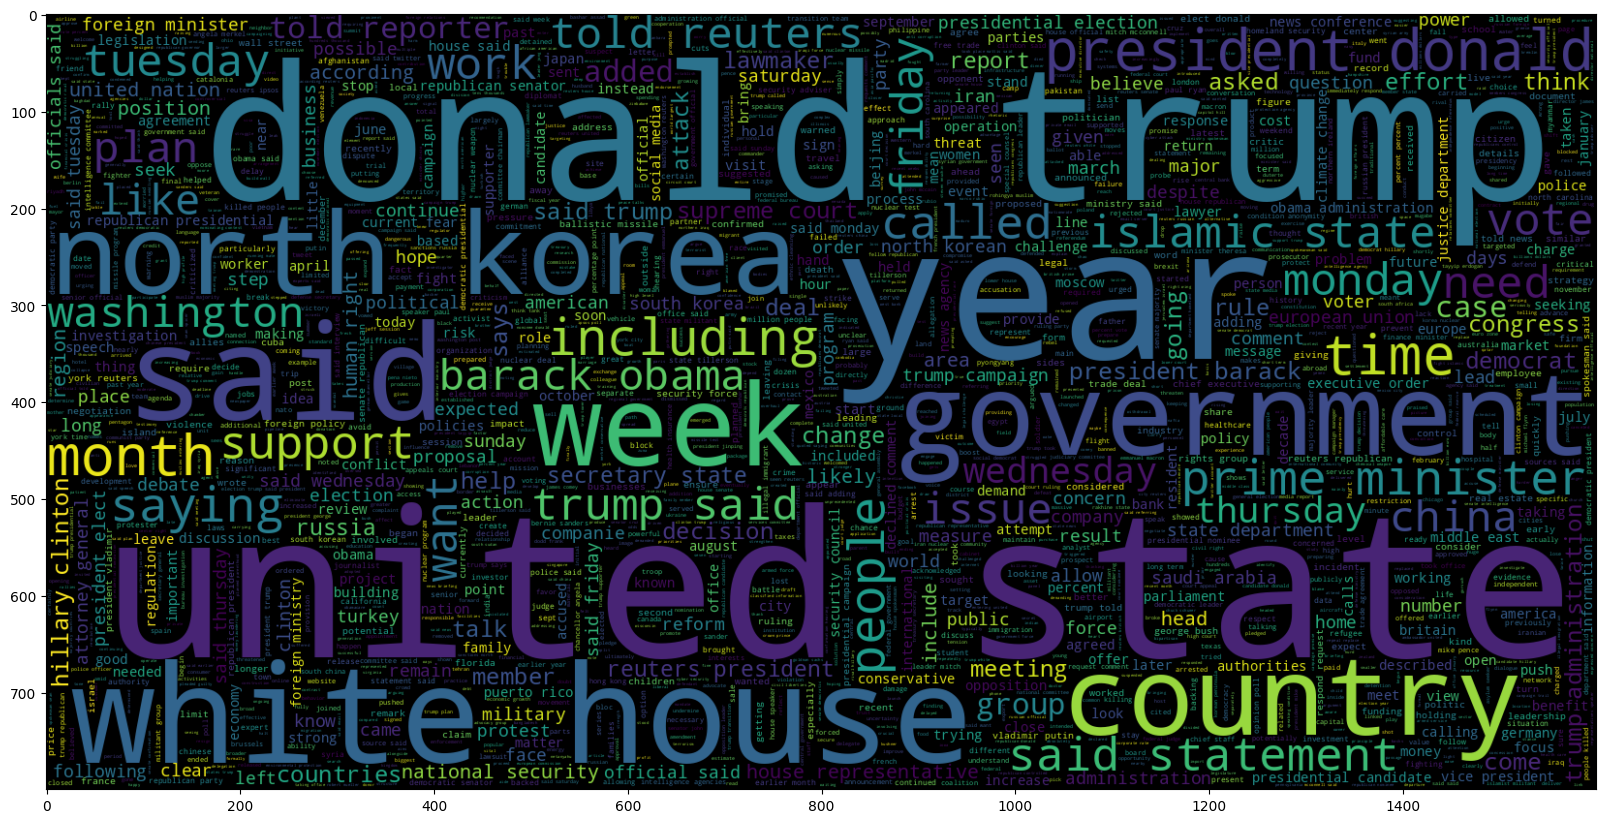

In [ ]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.Label	 == 1].final_news))
plt.imshow(wc, interpolation = 'bilinear')

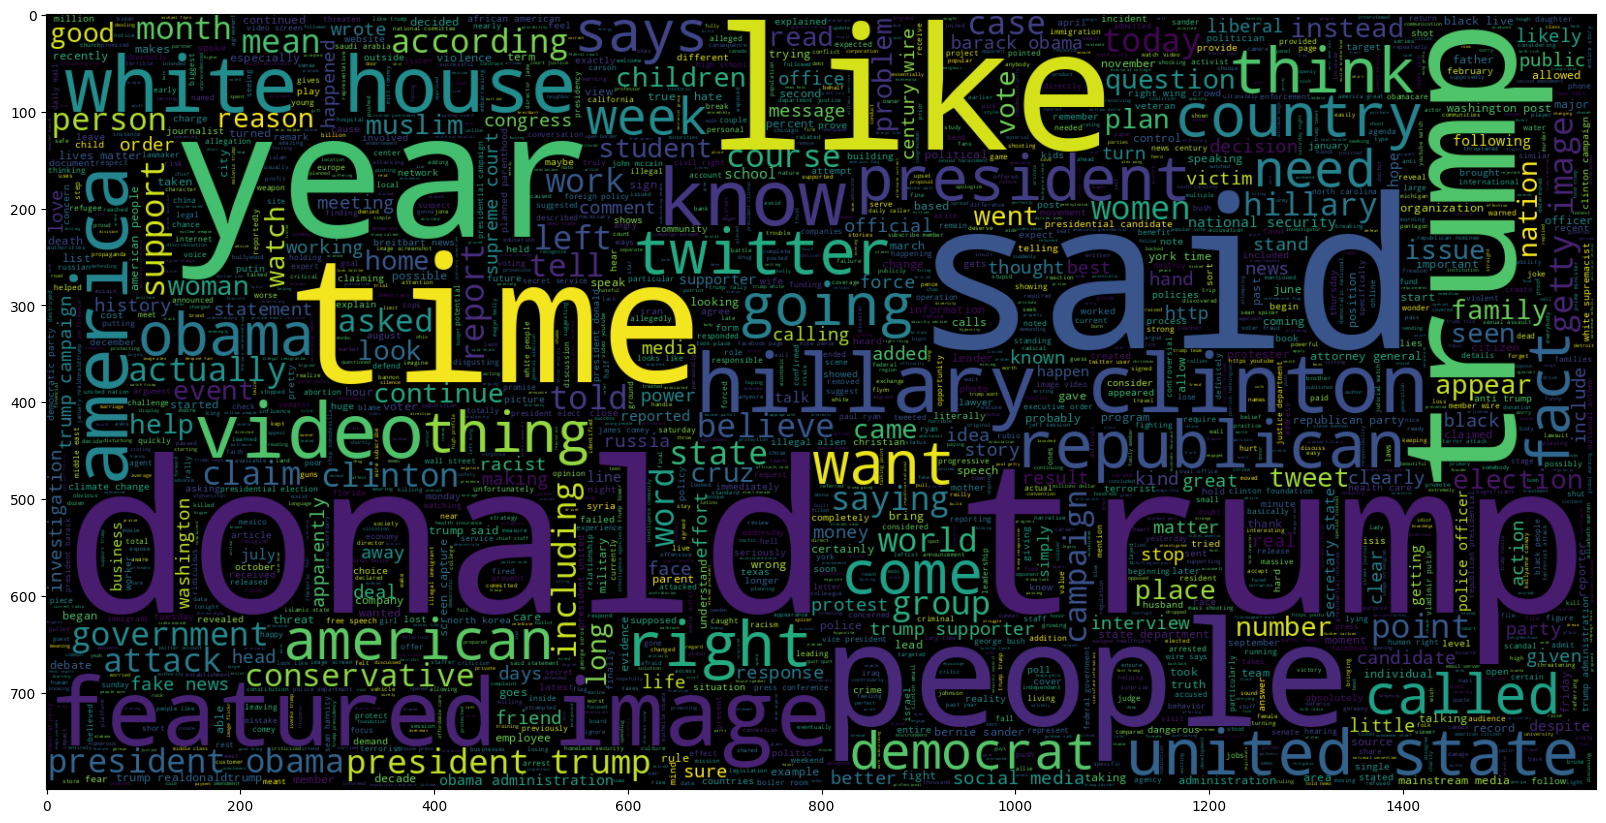

In [ ]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.Label == 0].final_news))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
y = df['Label'].values
X = df.drop(['Label'],axis=1)

In [ ]:
y.shape

(44898,)

In [ ]:
embedding_glove=f'/content/glove.6B.50d.txt'
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(embedding_glove) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [ ]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X['final_news']))
X = tokenizer.texts_to_sequences(list(X['final_news']))

# pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=100)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [ ]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 122745 unique tokens.


In [ ]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(20000, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, 50))
for word, i in word2idx.items():
  if i < 20000:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [ ]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  50,
  weights=[embedding_matrix],
  input_length=100,
  trainable=False
)

In [ ]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(100,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

Building model...
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 50)           1000000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 30)          7920      
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 30)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,007,951
Trainable params:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

In [ ]:
print('Training model...')
r = model.fit(
  X_train,
  y_train,
  batch_size=32,
  epochs=10,
  validation_split=0.2
)

Training model...
Epoch 1/10
898/898 [==============================] - 17s 14ms/step - loss: 0.2378 - accuracy: 0.9087 - val_loss: 0.1578 - val_accuracy: 0.9410
Epoch 2/10
898/898 [==============================] - 12s 13ms/step - loss: 0.1493 - accuracy: 0.9446 - val_loss: 0.1284 - val_accuracy: 0.9528
Epoch 3/10
898/898 [==============================] - 12s 13ms/step - loss: 0.1250 - accuracy: 0.9537 - val_loss: 0.1255 - val_accuracy: 0.9539
Epoch 4/10
898/898 [==============================] - 12s 13ms/step - loss: 0.1132 - accuracy: 0.9588 - val_loss: 0.1086 - val_accuracy: 0.9624
Epoch 5/10
898/898 [==============================] - 12s 13ms/step - loss: 0.1005 - accuracy: 0.9632 - val_loss: 0.0955 - val_accuracy: 0.9660
Epoch 6/10
898/898 [==============================] - 12s 13ms/step - loss: 0.0897 - accuracy: 0.9677 - val_loss: 0.0915 - val_accuracy: 0.9673
Epoch 7/10
898/898 [==============================] - 12s 14ms/step - loss: 0.0815 - accuracy: 0.9697 - val_loss: 0.08

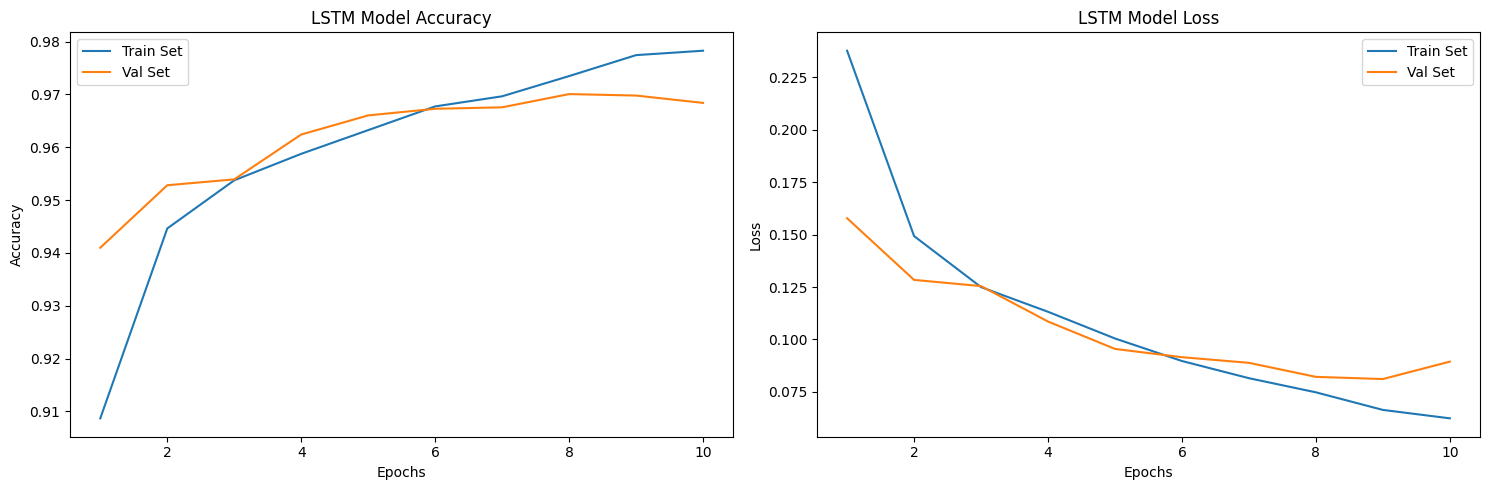

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(1, len(r.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')

plt.tight_layout()
plt.show()

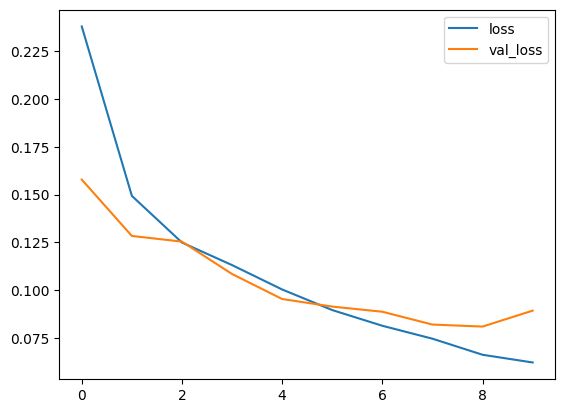

In [ ]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

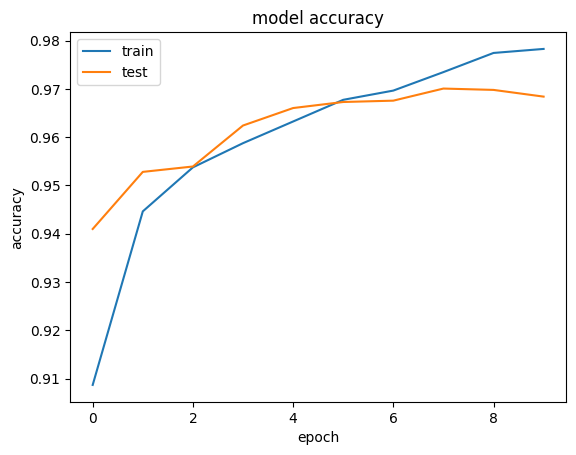

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

1123/1123 [==============================] - 7s 6ms/step - loss: 0.0656 - accuracy: 0.9773
Accuracy of the model on Training Data is -  97.72815704345703
281/281 [==============================] - 2s 6ms/step - loss: 0.0972 - accuracy: 0.9647
Accuracy of the model on Testing Data is -  96.46993279457092


In [ ]:
pred = model.predict(X_test)
pred[:5]

281/281 [==============================] - 2s 6ms/step


array([[6.2664767e-05],
       [2.0152442e-04],
       [9.9995780e-01],
       [6.7775173e-04],
       [2.1207858e-04]], dtype=float32)

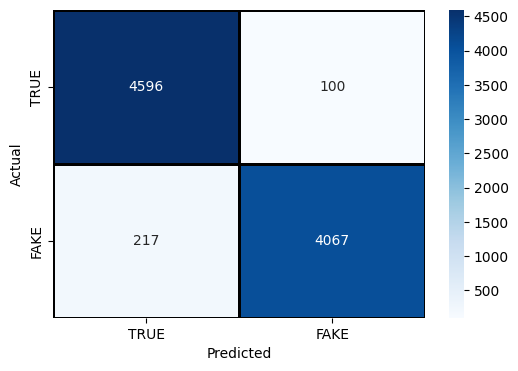

In [ ]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4696
           1       0.98      0.95      0.96      4284

    accuracy                           0.96      8980
   macro avg       0.97      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [ ]:
testSent =["Enter news to check if real or fake "]

In [ ]:
def cleanText(txt):
    txt = txt.lower()
    txt = ' '.join([word for word in txt.split() if word not in (stop_words)])
    txt = re.sub('[^a-z]',' ',txt)
    return txt

In [ ]:
def predict_text(lst_text):
    test = tokenizer.texts_to_sequences(lst_text)
    # pad sequences so that we get a N x T matrix
    testX = pad_sequences(test, maxlen=100)
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])

    prediction = model.predict(testX)
    df_test['prediction']=prediction
    df_test["test_sent"] = df_test["test_sent"].apply(cleanText)
    df_test['prediction']=df_test['prediction'].apply(lambda x: "Fake" if x<=0.5 else "Real")
    return df_test

In [ ]:
df_testsent = predict_text(testSent)
df_testsent

1/1 [==============================] - 0s 28ms/step


,test_sent,prediction
0,jordan government forced bring legislation par...,Real
